In [1]:
from fastai.conv_learner import *
from fastai.plots import *
from sklearn.metrics import confusion_matrix
from tools.data_wrangling import folders_to_csv

In [2]:
import seaborn as sns

In [3]:
PATH = 'data/plant-seedlings-classification/'
label_csv = os.path.join(PATH, 'labels.csv')
train_path = os.path.join(PATH, 'train')

Because I want to take advantage of the fastai library, I need to change my training folder directory structure from using a directory for each class,
![folder_training_style](../pictures/plant-seedlings-classification/folder_style.png)

to putting all images into a single train folder and a csv file that describes what species corresponds to each filename
![csv_training_style](../pictures/plant-seedlings-classification/csv_style.png)

In [4]:
folders_to_csv(train_path, label_csv)

label.csv already exists - exiting


In [5]:
pd.read_csv(label_csv).head()

,file,species
0,89b84d6e9.png,Charlock
1,67e37de9b.png,Charlock
2,a30113dfc.png,Charlock
3,88c8cbb35.png,Charlock
4,ba2cfd858.png,Charlock


In [6]:
sz = 224
arch = resnet50
bs = 64

In [7]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [8]:
# val_idxs = 0

In [9]:
# !rm -rf {PATH}tmp

In [10]:
def get_data(sz, bs, arch):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, test_name='test',
                                        val_idxs=val_idxs, tfms=tfms, bs=bs)
    return data.resize(int(sz*1.3)) if sz > 300 else data.resize(340, 'tmp')

In [11]:
data = get_data(sz, bs, arch)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

![cached pictures](../pictures/plant-seedlings-classification/cached_pictures.png)

In [12]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=.5)

initial training for the newly added layer - don't want to mess it up

In [13]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 48%|████▊     | 29/60 [00:02<00:02, 13.72it/s, loss=15.2]


In [53]:
%matplotlib 

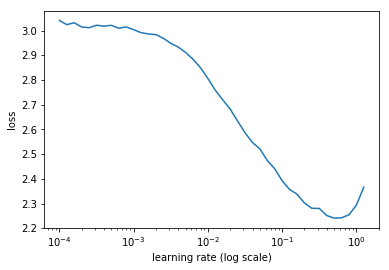

In [16]:
fig = learn.sched.plot()

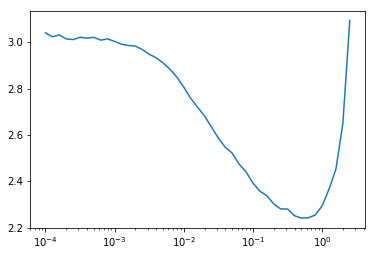

In [18]:
start = 10
end = -2
x = learn.sched.lrs[start:end]
y = learn.sched.losses[start:end]
plt.plot(x, y)
plt.xscale('log')

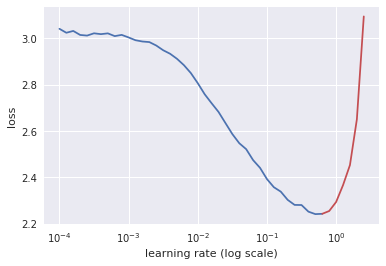

In [47]:
start = 10
end = -2
split = 38
x = learn.sched.lrs[start:end]
y = learn.sched.losses[start:end]
x1, x2 = x[:split+1], x[split:]
y1, y2 = y[:split+1], y[split:]
plt.plot(x1, y1, color=(sns.color_palette()[0]))
plt.plot(x2, y2, color=(sns.color_palette()[2]))
plt.ylabel("loss")
plt.xlabel("learning rate (log scale)")
plt.xscale('log')
sns.set()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [24]:
len(x)

45

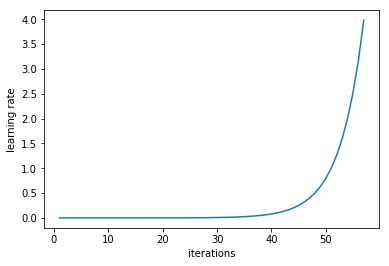

In [31]:
learn.sched.plot_lr()

In [15]:
learn.fit(.1, n_cycle=4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch:   0, train_loss: 1.288536, val_loss: 0.033376, accuracy: 1.000000
epoch:   1, train_loss: 1.070119, val_loss: 0.044764, accuracy: 1.000000
epoch:   2, train_loss: 0.711613, val_loss: 0.099706, accuracy: 1.000000
epoch:   3, train_loss: 0.672258, val_loss: 0.057846, accuracy: 1.000000
epoch:   4, train_loss: 0.558888, val_loss: 0.035882, accuracy: 1.000000
epoch:   5, train_loss: 0.446815, val_loss: 0.071348, accuracy: 1.000000
epoch:   6, train_loss: 0.378389, val_loss: 0.073037, accuracy: 1.000000
epoch:   7, train_loss: 0.425183, val_loss: 0.103671, accuracy: 1.000000
epoch:   8, train_loss: 0.423628, val_loss: 0.229405, accuracy: 1.000000
epoch:   9, train_loss: 0.364605, val_loss: 0.038667, accuracy: 1.000000
epoch:  10, train_loss: 0.319660, val_loss: 0.025507, accuracy: 1.000000
epoch:  11, train_loss: 0.292152, val_loss: 0.127161, accuracy: 1.000000
epoch:  12, train_loss: 0.271341, val_loss: 0.065667, accuracy: 1.000000
epoch:  13, train_loss: 0.227270, val_loss: 0.03611

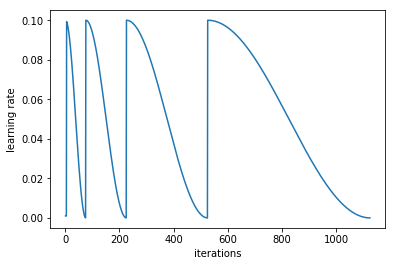

In [16]:
learn.sched.plot_lr()

now a few cycles of data augmentation - I should A/B test this

In [17]:
learn.precompute = False
learn.fit(.01, n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.536908, val_loss: 0.035681, accuracy: 1.000000
epoch:   1, train_loss: 0.504692, val_loss: 0.056180, accuracy: 1.000000
epoch:   2, train_loss: 0.494099, val_loss: 0.049894, accuracy: 1.000000
epoch:   3, train_loss: 0.477862, val_loss: 0.058166, accuracy: 1.000000
epoch:   4, train_loss: 0.483625, val_loss: 0.048515, accuracy: 1.000000
epoch:   5, train_loss: 0.476418, val_loss: 0.054736, accuracy: 1.000000
epoch:   6, train_loss: 0.458674, val_loss: 0.059870, accuracy: 1.000000



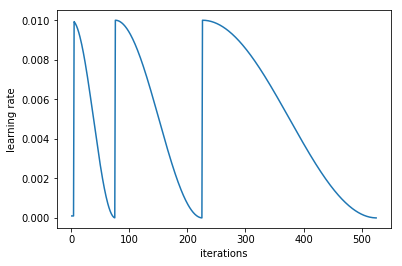

In [18]:
learn.sched.plot_lr()

In [19]:
def model_save_load(filename):
    save_or_load = input()
    if save_or_load == 'save':
        learn.save(filename)
    if save_or_load == 'load':
        learn.load(filename)

In [ ]:
model_save_load('initial_training')

In [20]:
learn.unfreeze()

In [21]:
lr = .01

In [22]:
learn.fit([lr/9, lr/3, lr], n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.474474, val_loss: 0.034284, accuracy: 1.000000
epoch:   1, train_loss: 0.299142, val_loss: 0.024248, accuracy: 1.000000
epoch:   2, train_loss: 0.200061, val_loss: 0.014761, accuracy: 1.000000
epoch:   3, train_loss: 0.187284, val_loss: 0.072558, accuracy: 1.000000
epoch:   4, train_loss: 0.146352, val_loss: 0.024144, accuracy: 1.000000
epoch:   5, train_loss: 0.117857, val_loss: 0.014808, accuracy: 1.000000
epoch:   6, train_loss: 0.108970, val_loss: 0.015632, accuracy: 1.000000



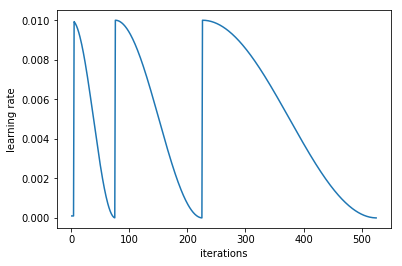

In [23]:
learn.sched.plot_lr()

In [24]:
model_save_load('resnet50_224')

save


In [25]:
learn.set_data(get_data(299,32,arch,label_csv))
learn.precompute = False
learn.unfreeze()

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [26]:
lr = .01

In [27]:
learn.fit([lr/9, lr/3, lr], n_cycle=3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch:   0, train_loss: 0.188035, val_loss: 0.007355, accuracy: 1.000000
epoch:   1, train_loss: 0.179518, val_loss: 0.029436, accuracy: 1.000000
epoch:   2, train_loss: 0.120721, val_loss: 0.020514, accuracy: 1.000000
epoch:   3, train_loss: 0.157036, val_loss: 0.156203, accuracy: 1.000000
epoch:   4, train_loss: 0.112107, val_loss: 0.005205, accuracy: 1.000000
epoch:   5, train_loss: 0.075675, val_loss: 0.059178, accuracy: 1.000000
epoch:   6, train_loss: 0.063902, val_loss: 0.063752, accuracy: 1.000000



In [28]:
n_cycle = 5

In [29]:
learn.fit([lr/9, lr/3, lr], n_cycle=n_cycle, cycle_len=4, cycle_mult=1, cycle_save_name='ensemble')

HBox(children=(IntProgress(value=0, description='Epoch', max=20), HTML(value='')))

epoch:   0, train_loss: 0.097088, val_loss: 0.018319, accuracy: 1.000000
epoch:   1, train_loss: 0.073988, val_loss: 0.034222, accuracy: 1.000000
epoch:   2, train_loss: 0.055121, val_loss: 0.155578, accuracy: 1.000000
epoch:   3, train_loss: 0.056097, val_loss: 0.142830, accuracy: 1.000000
epoch:   4, train_loss: 0.077097, val_loss: 0.032986, accuracy: 1.000000
epoch:   5, train_loss: 0.060424, val_loss: 0.406859, accuracy: 1.000000
epoch:   6, train_loss: 0.038940, val_loss: 0.118100, accuracy: 1.000000
epoch:   7, train_loss: 0.044501, val_loss: 0.129872, accuracy: 1.000000
epoch:   8, train_loss: 0.054164, val_loss: 0.024628, accuracy: 1.000000
epoch:   9, train_loss: 0.041293, val_loss: 0.442189, accuracy: 1.000000
epoch:  10, train_loss: 0.036228, val_loss: 0.013837, accuracy: 1.000000
epoch:  11, train_loss: 0.025590, val_loss: 0.014735, accuracy: 1.000000
epoch:  12, train_loss: 0.041849, val_loss: 0.096907, accuracy: 1.000000
epoch:  13, train_loss: 0.051811, val_loss: 0.06883

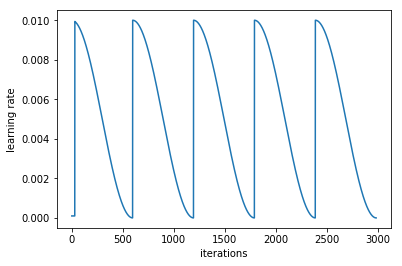

In [30]:
learn.sched.plot_lr()

In [42]:
log_preds_all = []
for i in range(n_cycle):
    learn.load(f'ensemble_cyc_{i}')
    log_preds, _ = learn.TTA(is_test=True, n_aug=8)
    log_preds = np.mean(log_preds, axis=0)
    log_preds_all.append(log_preds)

In [43]:
log_preds_mean = np.mean(np.array(log_preds_all), axis=0)

In [44]:
preds = np.argmax(np.exp(log_preds_mean), axis=1)

In [ ]:
# log_preds, _ = learn.TTA(is_test=False, n_aug=8)
# log_preds = np.mean(log_preds, axis=0)
# preds = np.argmax(np.exp(log_preds), axis=1)

In [ ]:
cm = confusion_matrix(y, preds); cm

In [ ]:
imr = ImageModelResults(data.val_ds, log_preds)

In [ ]:
imr.plot_most_correct(0)

In [ ]:
imr.plot_most_correct(6)

In [ ]:
imr.plot_most_incorrect(0)

In [ ]:
imr.plot_most_incorrect(6)

In [ ]:
data.classes[0]

In [ ]:
data.classes[6]

In [ ]:
# def test_predictions(learn):
#     log_preds,y = learn.TTA(is_test=True, n_aug=8)
#     probs = np.mean(np.exp(log_preds), axis=0)
#     preds = np.argmax(probs, axis=1)
#     return preds

In [ ]:
# preds = test_predictions(learn)

In [45]:
def kaggle_submit(PATH, preds, data, sub_num):
    class_preds = [data.classes[x].replace('_', ' ') for x in preds]

    assert(len(class_preds) == len(data.test_ds.fnames))

    files = [x.split('/')[-1] for x in data.test_ds.fnames]

    df = pd.DataFrame(list(zip(files, class_preds)))
    df.columns = ['file', 'species']

    submit_folder = os.path.join(PATH, 'submit')
    submit_filepath = os.path.join(submit_folder, f'plant_submission{sub_num}.gz')
    os.makedirs(submit_folder, exist_ok=True)
    df.to_csv(submit_filepath, compression='gzip', index=False)
    return submit_filepath

In [46]:
print(kaggle_submit(PATH, preds, data, '1'))

data/plant-seedlings-classification/submit/plant_submission0.gz
